In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in and set up data

In [2]:
games = pd.read_csv('..\\data\\game.csv')
teams = pd.read_csv('..\\data\\Team Summaries.csv')
other_info = pd.read_csv('..\\data\\other_stats.csv')

In [3]:
games.game_date = pd.to_datetime(games.game_date)
games = games[games.game_date.dt.year >= 2000]
scores = games[['game_id','game_date','team_abbreviation_home','pts_home', 'team_abbreviation_away', 'pts_away', 'season_type' ]]
scores = scores.rename(columns={'team_abbreviation_home':'team', 'pts_home':'pts', 'team_abbreviation_away':'opponent', 'pts_away':'opp_pts'})

## Create dataset with values for a single team

Spurs were chosen mostly arbitrarily, but also since they've had consistent levels of success for a long time.

In [4]:
spurs=scores[(scores.team == 'SAS') | (scores.opponent == 'SAS')]
spurs=spurs[(spurs.season_type == 'Regular Season') | (spurs.season_type == 'Playoffs')]
other=other_info[(other_info['team_abbreviation_home'] == 'SAS') | (other_info['team_abbreviation_away'] == 'SAS')]
other = other[['game_id', 'team_abbreviation_home', 'total_turnovers_home','pts_paint_home','team_abbreviation_away','total_turnovers_away','pts_paint_away' ]]

temp={'game_id':[],'game_date':[],'team':[],'score':[],'season':[] ,'season_type':[], 'opp_drtg':[], 'pts_paint':[], 'turnovers':[]}
for index, row in spurs.iterrows():
    if row.game_date.month >= 10:
        season=(row.game_date.year + 1)
    else: 
        season=(row.game_date.year)
    if row.team == 'SAS':
        temp['team'].append(row.team)
        temp['score'].append(row.pts)
        odr=(teams[(teams.abbreviation == row.opponent)&(teams.season==season)].d_rtg.values)
        turn=(other[(other.game_id == row.game_id)].total_turnovers_home.values)
        pp=(other[(other.game_id == row.game_id)].pts_paint_home.values)



    else:
        temp['team'].append(row.opponent)
        temp['score'].append(row.opp_pts)
        odr=(teams[(teams.abbreviation == row.team)&(teams.season==season)].d_rtg.values)
        turn=(other[(other.game_id == row.game_id)].total_turnovers_away.values)
        pp=(other[(other.game_id == row.game_id)].pts_paint_away.values)


    

    if len(odr) == 0:
        odr = teams[(teams.season == season)].d_rtg.mean()
    else:
        odr = odr[0]

    if row.season_type == 'Regular Season':
        temp['season_type'].append(0)
    else:
        temp['season_type'].append(1)
    temp['season'].append(season)
    temp['game_date'].append(row.game_date)
    temp['opp_drtg'].append(odr)
    temp['game_id'].append(row.game_id)
    temp['turnovers'].append(turn)
    temp['pts_paint'].append(pp)
spurs = pd.DataFrame(temp)
spurs.opp_drtg = spurs.opp_drtg.astype(float)


score_diff allows us to standardize points scored by the defensive strength of the opponent.

In [5]:
spurs['score_diff'] = (spurs.score - spurs.opp_drtg)/spurs.opp_drtg
spurs['pts_paint']=spurs.pts_paint.str[0]
spurs['pts_paint'] = spurs.pts_paint.astype(float)
spurs['turnovers']=spurs.turnovers.str[0]
spurs['turnovers'] = spurs.turnovers.astype(float)

In [6]:
spurs.to_csv('..\\data\\spurs.csv', index=False)

## Data trend exploration

<AxesSubplot: >

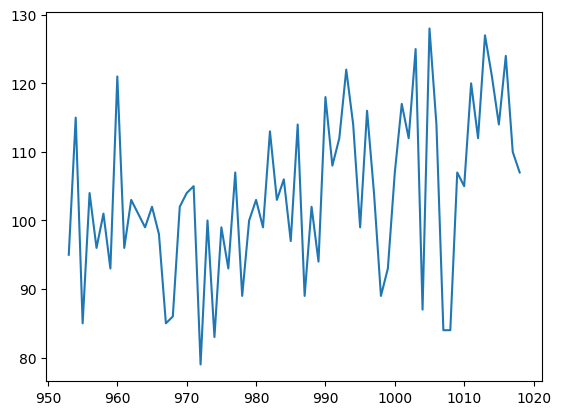

In [7]:
spurs = spurs[spurs['season_type']==0].reset_index(drop=True)
spurs[spurs['season']==2012].score.plot()

<AxesSubplot: >

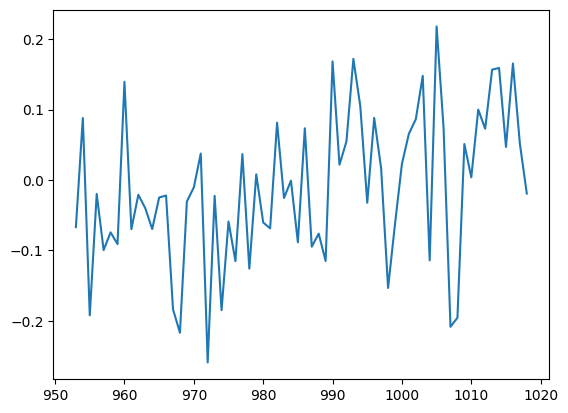

In [8]:
spurs = spurs[spurs['season_type']==0].reset_index(drop=True)
spurs[spurs.season==2012].score_diff.plot()

<AxesSubplot: >

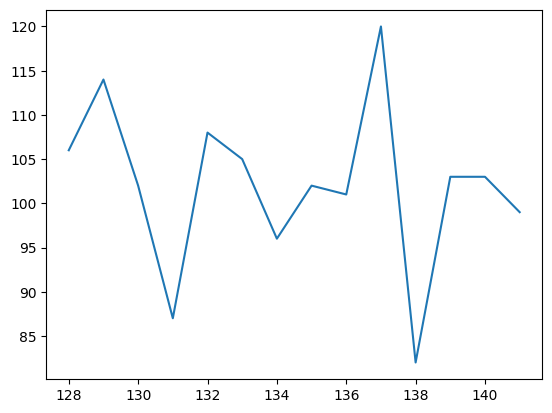

In [9]:
spurs = pd.read_csv('..\\data\\spurs.csv')
spurs = spurs[spurs['season_type']==1].reset_index(drop=True)
spurs[spurs.season==2012].score.plot()

<AxesSubplot: >

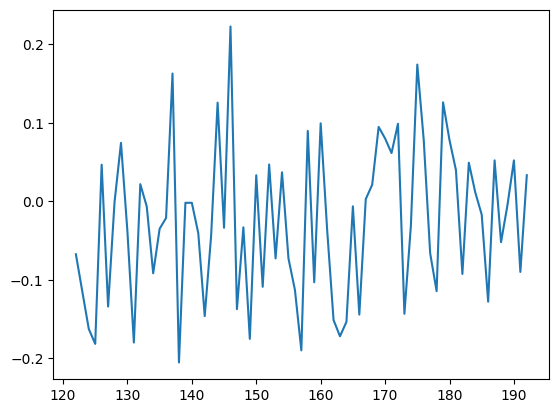

In [10]:
spurs[(spurs.season>2010)&(spurs.season<2016)].score_diff.plot()